# Employee Burnout Prediction

IMPORTING LIBRARIES

In [321]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


LOADING DATASET

In [322]:
data = pd.read_excel("employee_burnout_analysis-AI.xlsx")

DATA OVERVIEW

In [323]:
data.head(5)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [324]:
data.tail(6)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22744,fffe32003500370033003200,2008-05-27,Male,Product,No,3,7.0,6.2,0.54
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61


In [325]:
data.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [326]:
data.columns.tolist()

['Employee ID',
 'Date of Joining',
 'Gender',
 'Company Type',
 'WFH Setup Available',
 'Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Burn Rate']

In [327]:
data.nunique()

Employee ID             22750
Date of Joining           366
Gender                      2
Company Type                2
WFH Setup Available         2
Designation                 6
Resource Allocation        10
Mental Fatigue Score      101
Burn Rate                 101
dtype: int64

In [328]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [329]:
data.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [330]:
data.isnull().sum().values.sum()

4622

In [331]:
data['Gender'].value_counts()

Female    11908
Male      10842
Name: Gender, dtype: int64

In [332]:
data['Company Type'].value_counts()

Service    14833
Product     7917
Name: Company Type, dtype: int64

In [333]:
data['WFH Setup Available'].value_counts()

Yes    12290
No     10460
Name: WFH Setup Available, dtype: int64

In [334]:
data['Designation'].value_counts()

2    7588
3    5985
1    4881
4    2391
0    1507
5     398
Name: Designation, dtype: int64

In [335]:
data['Resource Allocation'].value_counts()

4.0     3893
5.0     3861
3.0     3192
6.0     2943
2.0     2075
7.0     1965
1.0     1791
8.0     1044
9.0      446
10.0     159
Name: Resource Allocation, dtype: int64

In [336]:
data['Mental Fatigue Score'].value_counts()

6.0    470
5.8    464
5.9    458
6.1    457
6.3    454
      ... 
0.5     24
0.2     23
0.4     19
0.1     17
0.3     13
Name: Mental Fatigue Score, Length: 101, dtype: int64

Removing outliers

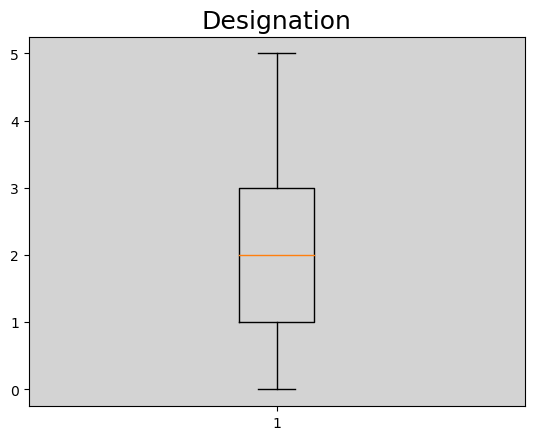

In [337]:
plt.boxplot(data['Designation'])
ax=plt.gca()
ax.set_facecolor('#D3D3D3')
plt.title("Designation", fontsize=18)
plt.show()

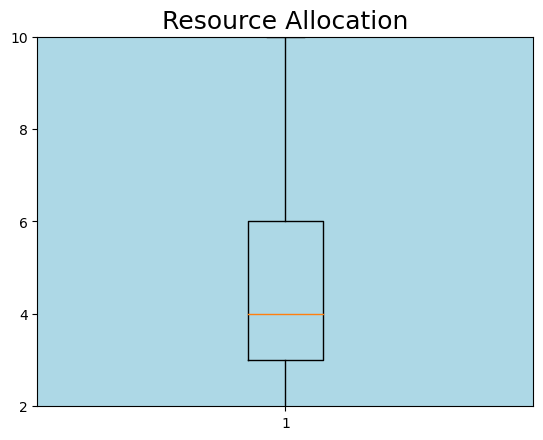

In [338]:
data = data.dropna()
plt.boxplot(data['Resource Allocation'])
ax = plt.gca()
ax.set_facecolor('#ADD8E6')
ax.set_ylim([2, 10])
ax.set_yticks([2, 4, 6, 8, 10])
plt.title("Resource Allocation", fontsize=18)
plt.show()

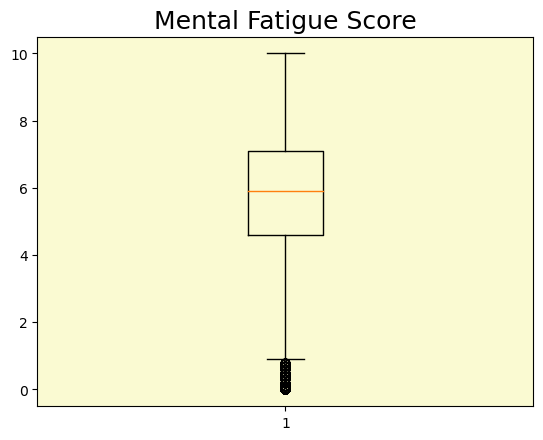

In [339]:
plt.boxplot(data['Mental Fatigue Score'])
ax=plt.gca()
ax.set_facecolor('#FAFAD2')
plt.title("Mental Fatigue Score", fontsize=18)
plt.show()

In [340]:
data=data[data['Mental Fatigue Score']>=0.9]

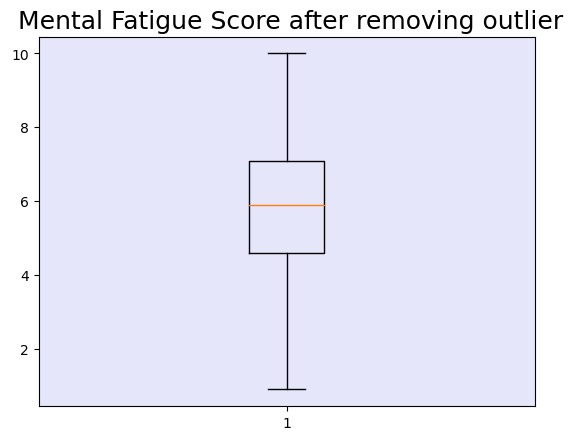

In [341]:
plt.boxplot(data['Mental Fatigue Score'])
ax=plt.gca()
ax.set_facecolor('#E6E6FA')
plt.title(" Mental Fatigue Score after removing outlier", fontsize=18)
plt.show()

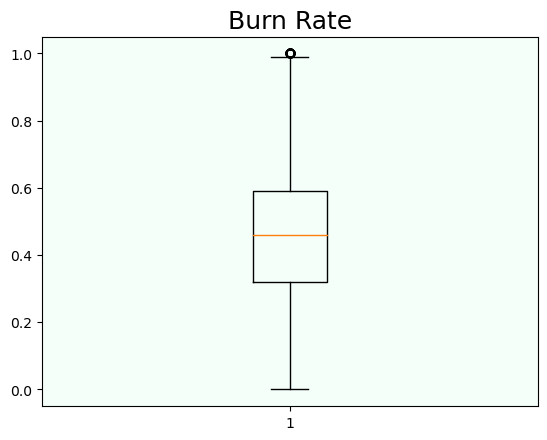

In [342]:
plt.boxplot(data['Burn Rate'])
ax=plt.gca()
ax.set_facecolor('#F5FFFA')
plt.title("Burn Rate", fontsize=18)
plt.show()

In [343]:
data=data[(data['Burn Rate']<=0.99) & (data['Burn Rate']>=0)]

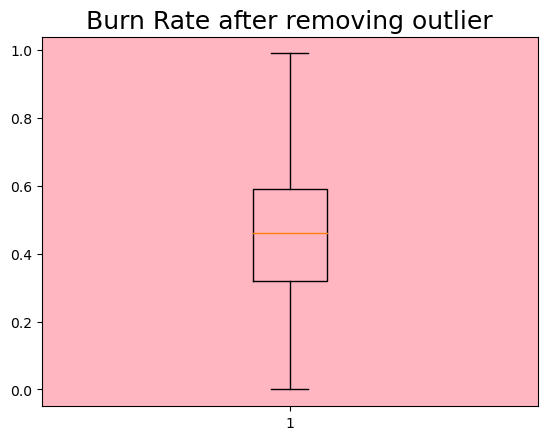

In [344]:
plt.boxplot(data['Burn Rate'])
ax=plt.gca()
ax.set_facecolor('#FFB6C1')
plt.title("Burn Rate after removing outlier", fontsize=18)
plt.show()

Exploratory Data Analysis

In [345]:
data.corr(numeric_only=True)['Burn Rate'][:-1]

Designation             0.719458
Resource Allocation     0.845620
Mental Fatigue Score    0.941141
Name: Burn Rate, dtype: float64

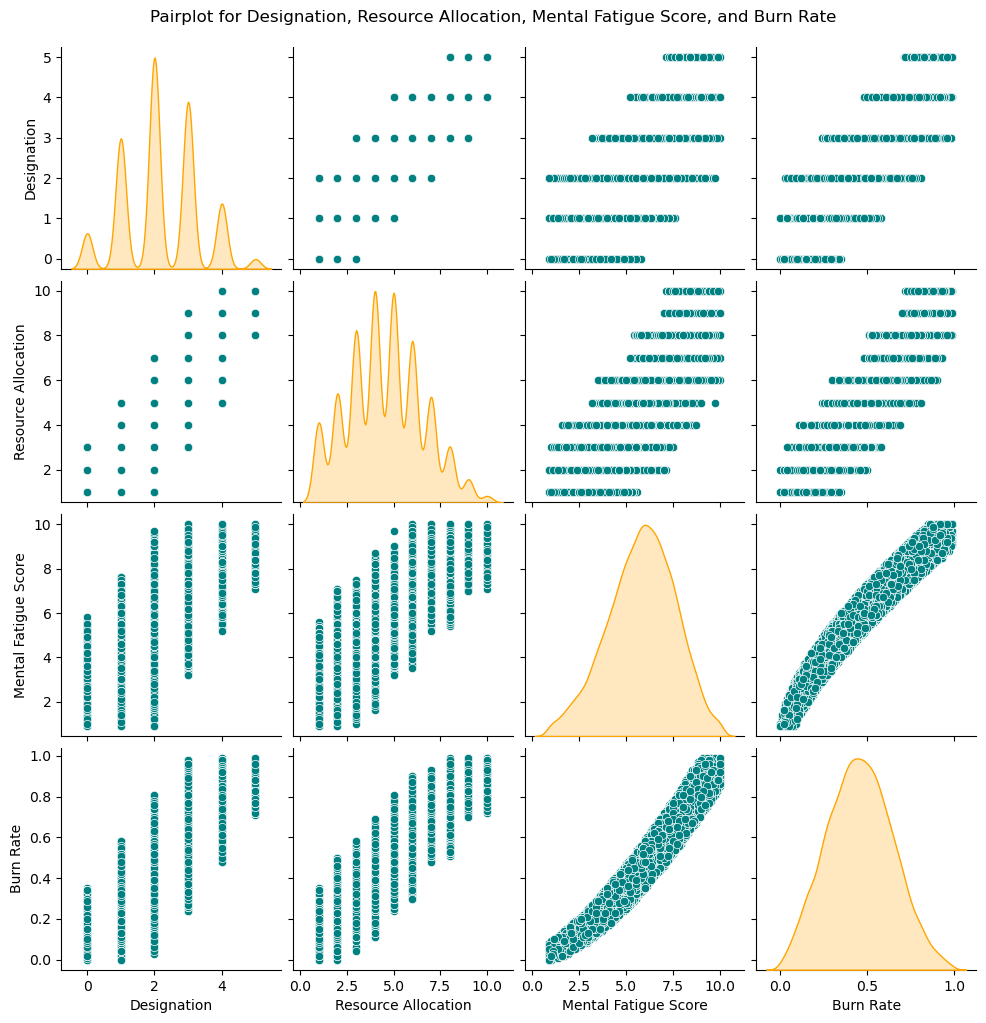

In [346]:


subset_data = data[['Designation', 'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']]

# Create a pair plot
pairplot = sns.pairplot(subset_data, diag_kind='kde', plot_kws={'color': 'teal'}, diag_kws={'color': 'orange'})
pairplot.fig.suptitle('Pairplot for Designation, Resource Allocation, Mental Fatigue Score, and Burn Rate', y=1.02)

# Display the plot
plt.show()

In [347]:
data = data.dropna()

In [348]:
data['Gender'].value_counts()

Female    9525
Male      8690
Name: Gender, dtype: int64

In [349]:
data['Company Type'].value_counts()

Service    11939
Product     6276
Name: Company Type, dtype: int64

In [350]:
data['WFH Setup Available'].value_counts()

Yes    9809
No     8406
Name: WFH Setup Available, dtype: int64

In [351]:
data['Designation'].value_counts()

2    6214
3    4914
1    3836
4    1921
0    1046
5     284
Name: Designation, dtype: int64

In [352]:
data['Resource Allocation'].value_counts()

4.0     3396
5.0     3364
3.0     2761
6.0     2590
2.0     1750
7.0     1695
1.0     1285
8.0      898
9.0      372
10.0     104
Name: Resource Allocation, dtype: int64

In [353]:
data['Mental Fatigue Score'].value_counts()

6.0    429
5.9    413
6.3    410
6.1    406
5.8    406
      ... 
9.6     29
1.4     29
1.2     24
1.1     23
9.9     20
Name: Mental Fatigue Score, Length: 92, dtype: int64

In [354]:
data.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [355]:
data.isnull().sum().values.sum()

0

In [356]:
data.shape

(18215, 9)

In [357]:
data.dtypes

Employee ID                     object
Date of Joining         datetime64[ns]
Gender                          object
Company Type                    object
WFH Setup Available             object
Designation                      int64
Resource Allocation            float64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object

In [358]:
data = data.drop('Employee ID' , axis = 1)

 Min date 2008-01-01 00:00:00
 Max date 2008-12-31 00:00:00


<Axes: xlabel='Month', ylabel='Hired employees'>

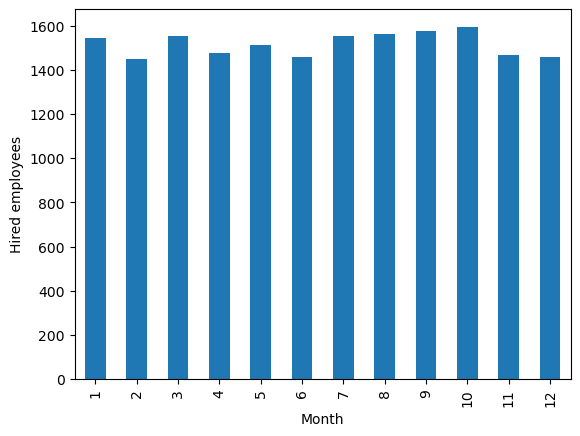

In [359]:
print(f" Min date {data['Date of Joining'].min()}")
print(f" Max date {data[ 'Date of Joining'].max()}")
data_month = data.copy()

data_month["Date of Joining"] = data_month['Date of Joining'].astype("datetime64[ns]")
data_month["Date of Joining"].groupby(data_month['Date of Joining'].dt.month).count().plot(kind="bar", xlabel='Month', ylabel='Hired employees')

In [360]:
data_2008 = pd.to_datetime(["2008-01-01"]*len(data))
data["Days"] = data['Date of Joining'].astype("datetime64[ns]").sub(data_2008).dt.days
data.Days

0        273
1        334
3        307
4        205
5        330
        ... 
22743    349
22744    147
22746     18
22748      9
22749      5
Name: Days, Length: 18215, dtype: int64

In [361]:
numeric_data = data.select_dtypes(include=['number'])
correlation = numeric_data.corr()['Burn Rate']
print(correlation)

Designation             0.719458
Resource Allocation     0.845620
Mental Fatigue Score    0.941141
Burn Rate               1.000000
Days                    0.003017
Name: Burn Rate, dtype: float64


In [362]:
data.corr(numeric_only=True)['Burn Rate'][:]

Designation             0.719458
Resource Allocation     0.845620
Mental Fatigue Score    0.941141
Burn Rate               1.000000
Days                    0.003017
Name: Burn Rate, dtype: float64

In [363]:
data = data.drop(['Date of Joining','Days'], axis = 1)

In [364]:
data.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,Female,Service,No,2,3.0,3.8,0.16
1,Male,Service,Yes,1,2.0,5.0,0.36
3,Male,Service,Yes,1,1.0,2.6,0.20
4,Female,Service,No,3,7.0,6.9,0.52
5,Male,Product,Yes,2,4.0,3.6,0.29


Data visualization

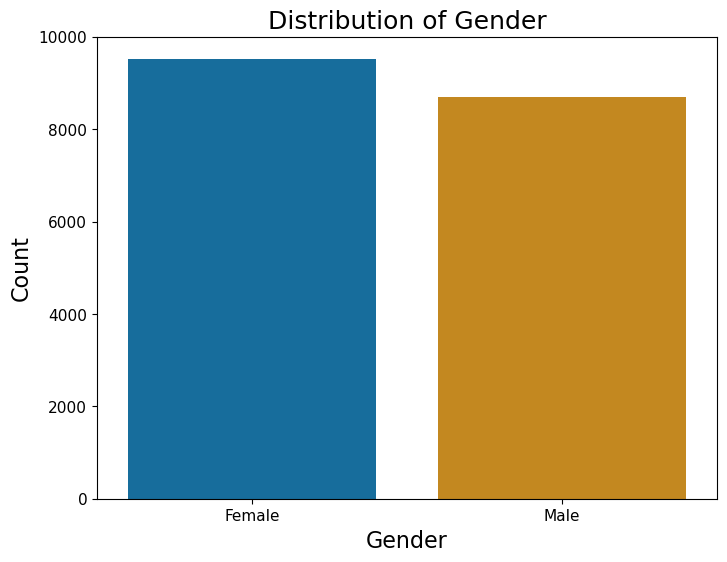

In [368]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Gender", data=data,  palette="colorblind")
plt.title("Distribution of Gender", fontsize=18)
plt.xlabel("Gender", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

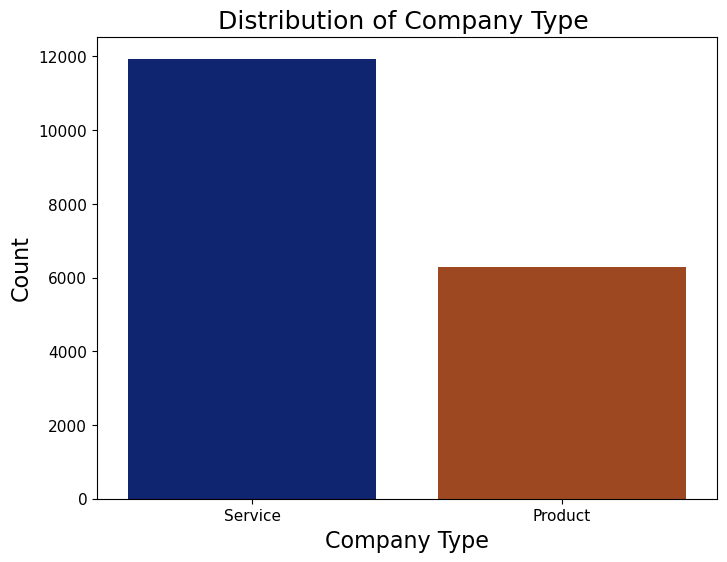

In [369]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Company Type", data=data,  palette="dark")
plt.title("Distribution of Company Type ", fontsize=18)
plt.xlabel("Company Type", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

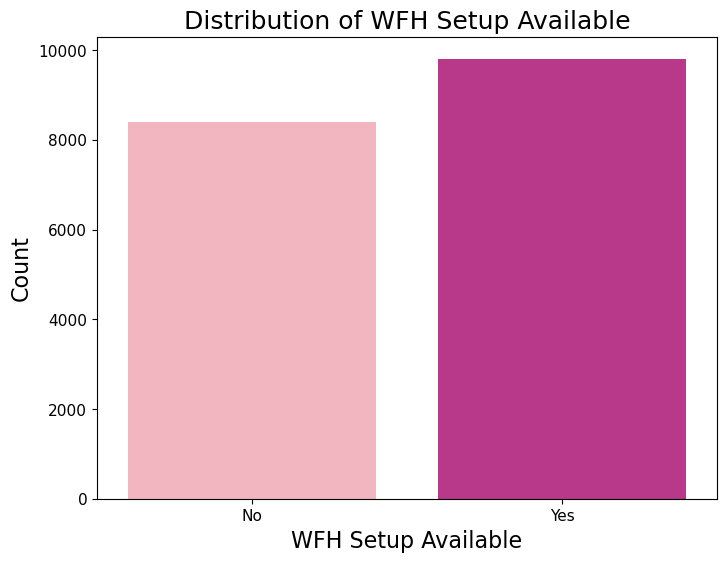

In [370]:
plt.figure(figsize=(8, 6))
sns.countplot(x="WFH Setup Available", data=data,  palette="RdPu")
plt.title("Distribution of WFH Setup Available", fontsize=18)
plt.xlabel("WFH Setup Available", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

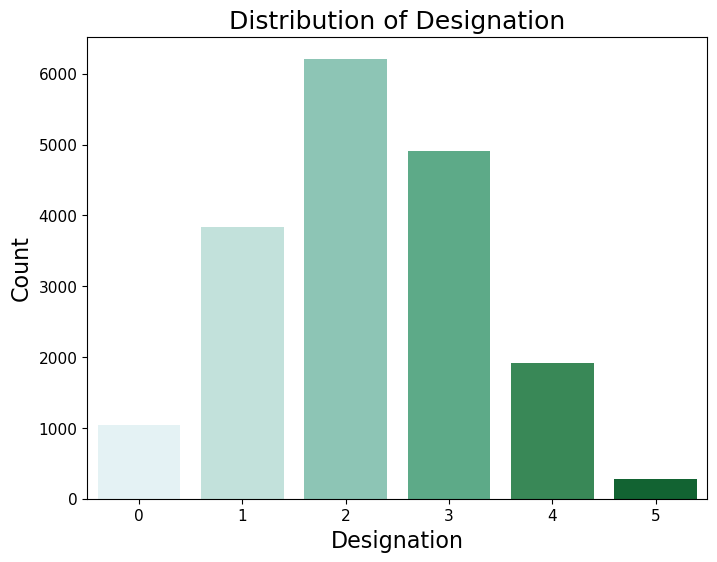

In [371]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Designation", data=data,  palette="BuGn")
plt.title("Distribution of Designation", fontsize=18)
plt.xlabel("Designation", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

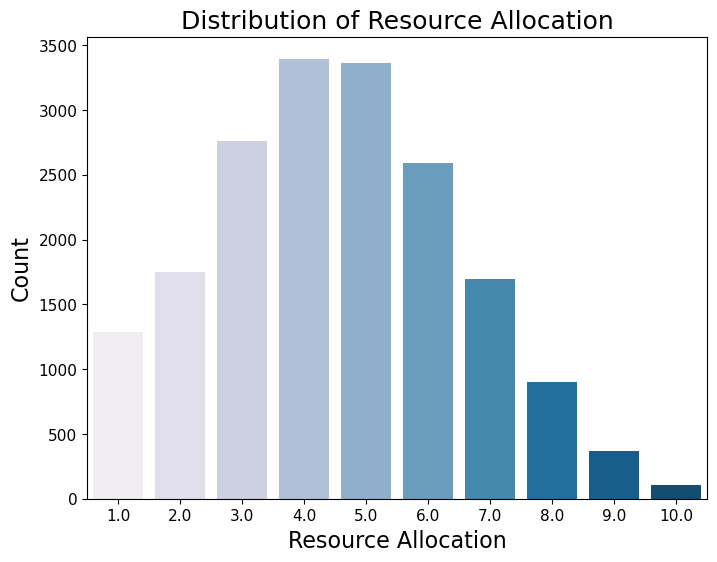

In [372]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Resource Allocation", data=data,  palette="PuBu")
plt.title("Distribution of Resource Allocation", fontsize=18)
plt.xlabel("Resource Allocation", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

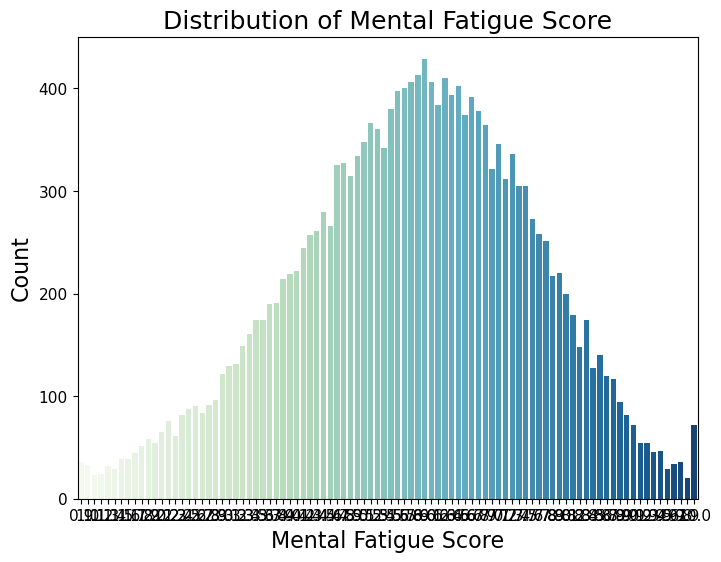

In [373]:

plt.figure(figsize=(8, 6))
sns.countplot(x="Mental Fatigue Score", data=data,  palette="GnBu")
plt.title("Distribution of Mental Fatigue Score", fontsize=18)
plt.xlabel("Mental Fatigue Score", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

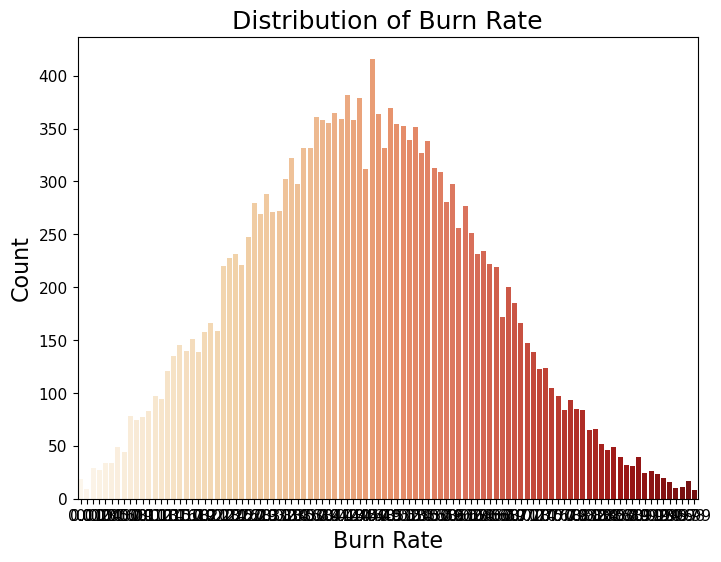

In [374]:

plt.figure(figsize=(8, 6))
sns.countplot(x="Burn Rate", data=data,  palette="OrRd")
plt.title("Distribution of Burn Rate", fontsize=18)
plt.xlabel("Burn Rate", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()


One Hot Encoding

In [375]:
#check if the columns exist before applying get_dummies
if all(col in data.columns for col in ['Company Type', 'WFH Setup Available', 'Gender']):
  data =pd.get_dummies(data,columns=['Company Type', 'WFH Setup Available', 'Gender'],drop_first=True)
  data.head()
  encoded_columns=data.columns
  print(encoded_columns)
else:
  print("Error: One or more of the specified columns are not present in the Data Frame.")
#Add debugging steps here to investigate why the columns are missing
# for example, print the existing columns:
print(data.columns)

Index(['Designation', 'Resource Allocation', 'Mental Fatigue Score',
       'Burn Rate', 'Company Type_Service', 'WFH Setup Available_Yes',
       'Gender_Male'],
      dtype='object')
Index(['Designation', 'Resource Allocation', 'Mental Fatigue Score',
       'Burn Rate', 'Company Type_Service', 'WFH Setup Available_Yes',
       'Gender_Male'],
      dtype='object')


In [376]:
data.columns.tolist()

['Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Burn Rate',
 'Company Type_Service',
 'WFH Setup Available_Yes',
 'Gender_Male']

In [377]:
data.corr()['Burn Rate'][:]

Designation                0.719458
Resource Allocation        0.845620
Mental Fatigue Score       0.941141
Burn Rate                  1.000000
Company Type_Service       0.003784
WFH Setup Available_Yes   -0.314860
Gender_Male                0.159454
Name: Burn Rate, dtype: float64

In [378]:
data=data.drop('Company Type_Service',axis=1)
data=data.drop('WFH Setup Available_Yes',axis=1)
data=data.drop('Gender_Male',axis=1)

In [379]:
data

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2,3.0,3.8,0.16
1,1,2.0,5.0,0.36
3,1,1.0,2.6,0.20
4,3,7.0,6.9,0.52
5,2,4.0,3.6,0.29
...,...,...,...,...
22743,1,3.0,6.0,0.48
22744,3,7.0,6.2,0.54
22746,3,6.0,6.7,0.59
22748,2,5.0,5.9,0.52


Preprocessing

Normalization or Feature selection

In [380]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Select numerical columns (excluding one-hot encoded)
numerical_cols = ['Designation','Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [381]:
data.head()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,0.4,0.222222,0.318681,0.161616
1,0.2,0.111111,0.450549,0.363636
3,0.2,0.000000,0.186813,0.202020
4,0.6,0.666667,0.659341,0.525253
5,0.4,0.333333,0.296703,0.292929


Model Training

In [382]:
y = data[ 'Burn Rate' ]
x = data.drop('Burn Rate', axis=1)

In [383]:
#Train the split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.75,random_state=1)
#scaler x
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train), index=x_train.index, columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test),index=x_test.index,columns=x_test.columns)

In [384]:
x_train

,Designation,Resource Allocation,Mental Fatigue Score
11549,0.2,0.111111,0.175824
15063,0.8,0.666667,0.604396
3275,0.2,0.222222,0.285714
3939,0.8,0.777778,0.538462
13943,0.6,0.444444,0.538462
...,...,...,...
13735,0.4,0.555556,0.604396
21623,0.6,0.444444,0.604396
6471,0.6,0.666667,0.857143
15260,0.2,0.222222,0.615385


In [385]:
y_train

11549    0.171717
15063    0.595960
3275     0.191919
3939     0.545455
13943    0.474747
           ...   
13735    0.575758
21623    0.424242
6471     0.707071
15260    0.464646
294      0.393939
Name: Burn Rate, Length: 4553, dtype: float64

Model Building

In [386]:
linear_regression_model = LinearRegression()

linear_regression_model.fit(x_train,y_train)

LinearRegression()

In [387]:
print("LINEAR REGRESSION MODEL PERFORMANCE METRICS:\n")

y_pred = linear_regression_model.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error:", mse)

rmse = mean_squared_error(y_test,y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

LINEAR REGRESSION MODEL PERFORMANCE METRICS:

Mean Squared Error: 0.0031053743161061197
Root Mean Squared Error: 0.05572588551208603
Mean Absolute Error: 0.04569259118674783
R-squared Score: 0.9139103276786389


Model Validation and Evaluation

In [388]:
new_data = {
    'Designation': [0.5751, 0.8, 0.6],
    'Resource Allocation': [0.6247, 0.7, 0.5],
    'Mental Fatigue Score': [0.7813, 0.9, 0.4]
}
new_inp = pd.DataFrame(new_data)
new_predict = linear_regression_model.predict(new_inp)
print("Prediction of burnout of employees is:", new_predict)

Prediction of burnout of employees is: [0.6877575  0.78460586 0.38743167]


In [389]:
new_data = {'Designation': [0.8],
             'Resource Allocation': [0.666667],
             'Mental Fatigue Score': [0.604396],
             }
new_input = pd.DataFrame(new_data)
actual_value=0.595960
new_predictions = linear_regression_model.predict(new_input)
print("The prediction of Burn Rate of an employee is: ",new_predictions," and actual value is: ",actual_value)


The prediction of Burn Rate of an employee is:  [0.56849091]  and actual value is:  0.59596
